In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
columns = [
    "class_code",
    "largest_spot_size",
    "spot_distribution",
    "activity",
    "evolution",
    "previous_24hr_activity",
    "historically_complex",
    "area",
    "area_largest_spot",
    "common_flare",
    "class_flares",
    "class_mc_flares",
    "class_x_flares"
]


In [6]:


df1 = pd.read_fwf(
    r"C:\PROJECTS\RM PROJECT\Dataset\flare.data1",
    header=None
)

df2 = pd.read_fwf(
    r"C:\PROJECTS\RM PROJECT\Dataset\flare.data2",
    header=None
)


In [ ]:
df1.shape

(324, 6)

In [10]:
with open(r"C:\PROJECTS\RM PROJECT\Dataset\flare.data1") as f:
    lines1 = f.readlines()

with open(r"C:\PROJECTS\RM PROJECT\Dataset\flare.data2") as f:
    lines2 = f.readlines()


In [11]:


data1 = [line.strip().split() for line in lines1]
data2 = [line.strip().split() for line in lines2]


In [12]:


df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)


In [13]:
df1.shape, df2.shape


((324, 13), (1067, 13))

In [14]:
df1.columns = columns
df2.columns = columns


In [15]:
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)


In [16]:
print(df.shape)
print(df.head())


(1391, 13)
      class_code largest_spot_size spot_distribution activity  evolution  \
0  *******DATA1;              1969             FLARE     DATA  (02/13/69   
1              C                 S                 O        1          2   
2              D                 S                 O        1          3   
3              C                 S                 O        1          3   
4              D                 S                 O        1          3   

  previous_24hr_activity historically_complex     area area_largest_spot  \
0                     to            03/27/69)  *******              None   
1                      1                    1        2                 1   
2                      1                    1        2                 1   
3                      1                    1        2                 1   
4                      1                    1        2                 1   

  common_flare class_flares class_mc_flares class_x_flares  
0         None

In [17]:
# To drop metadata
df = df.iloc[1:].reset_index(drop=True)


In [18]:
df.shape

(1390, 13)

In [19]:

df.head()

,class_code,largest_spot_size,spot_distribution,activity,evolution,previous_24hr_activity,historically_complex,area,area_largest_spot,common_flare,class_flares,class_mc_flares,class_x_flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [20]:
df.isnull().sum()

class_code                0
largest_spot_size         0
spot_distribution         0
activity                  0
evolution                 0
previous_24hr_activity    0
historically_complex      0
area                      0
area_largest_spot         0
common_flare              1
class_flares              1
class_mc_flares           1
class_x_flares            1
dtype: int64

In [21]:
df[df.isnull().any(axis=1)]


,class_code,largest_spot_size,spot_distribution,activity,evolution,previous_24hr_activity,historically_complex,area,area_largest_spot,common_flare,class_flares,class_mc_flares,class_x_flares
323,*******,DATA2;,1978,FLARE,DATA,(08/19/78,to,12/23/78),*****,None,None,None,None


In [22]:
df = df.dropna().reset_index(drop=True)


In [23]:
df.isnull().sum()

class_code                0
largest_spot_size         0
spot_distribution         0
activity                  0
evolution                 0
previous_24hr_activity    0
historically_complex      0
area                      0
area_largest_spot         0
common_flare              0
class_flares              0
class_mc_flares           0
class_x_flares            0
dtype: int64

In [24]:
df.to_csv('data-processed.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   class_code              1389 non-null   object
 1   largest_spot_size       1389 non-null   object
 2   spot_distribution       1389 non-null   object
 3   activity                1389 non-null   object
 4   evolution               1389 non-null   object
 5   previous_24hr_activity  1389 non-null   object
 6   historically_complex    1389 non-null   object
 7   area                    1389 non-null   object
 8   area_largest_spot       1389 non-null   object
 9   common_flare            1389 non-null   object
 10  class_flares            1389 non-null   object
 11  class_mc_flares         1389 non-null   object
 12  class_x_flares          1389 non-null   object
dtypes: object(13)
memory usage: 141.2+ KB


In [ ]:
# Converting to numeric columns

num_cols = [
    "activity",
    "evolution",
    "previous_24hr_activity",
    "historically_complex",
    "area",
    "area_largest_spot",
    "common_flare",
    "class_flares",
    "class_mc_flares",
    "class_x_flares"
]

df[num_cols] = df[num_cols].astype(int)

In [30]:
# Encoding categorical columns

from sklearn.preprocessing import LabelEncoder

cat_cols = [
    "class_code",
    "largest_spot_size",
    "spot_distribution"
]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [31]:
# Target Variable
# target column:class_flares
# problem type:Binary classification

df["target"] = (df["class_flares"]>0).astype(int)

Defines what you are predicting. Everything depends on this.

In [33]:
# Seperate Featues & Target Variables

x = df.drop(columns=["class_flares", "target"])
y = df["target"]

Models must not “see” the target during training.

In [34]:
# Verify & fxing the Data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   class_code              1389 non-null   int64
 1   largest_spot_size       1389 non-null   int64
 2   spot_distribution       1389 non-null   int64
 3   activity                1389 non-null   int64
 4   evolution               1389 non-null   int64
 5   previous_24hr_activity  1389 non-null   int64
 6   historically_complex    1389 non-null   int64
 7   area                    1389 non-null   int64
 8   area_largest_spot       1389 non-null   int64
 9   common_flare            1389 non-null   int64
 10  class_mc_flares         1389 non-null   int64
 11  class_x_flares          1389 non-null   int64
dtypes: int64(12)
memory usage: 130.3 KB


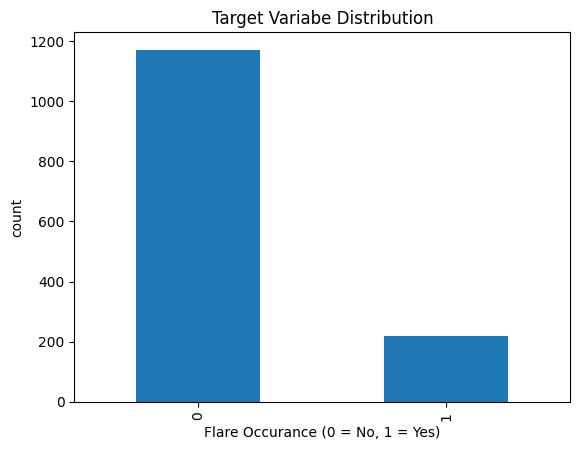

In [36]:
# Target Distribution

import matplotlib.pyplot as plt
plt.figure()
y.value_counts().plot(kind="bar")
plt.title("Target Variabe Distribution")
plt.xlabel("Flare Occurance (0 = No, 1 = Yes)")
plt.ylabel("count")
plt.show()

The target distribution plot shows a significant class imbalance, with non-flare events occurring far more frequently than flare events. This reflects the natural rarity of solar flares and indicates that accuracy alone is not an appropriate evaluation metric. Precision, recall, and F1-score must be considered, and imbalance-handling techniques may be required

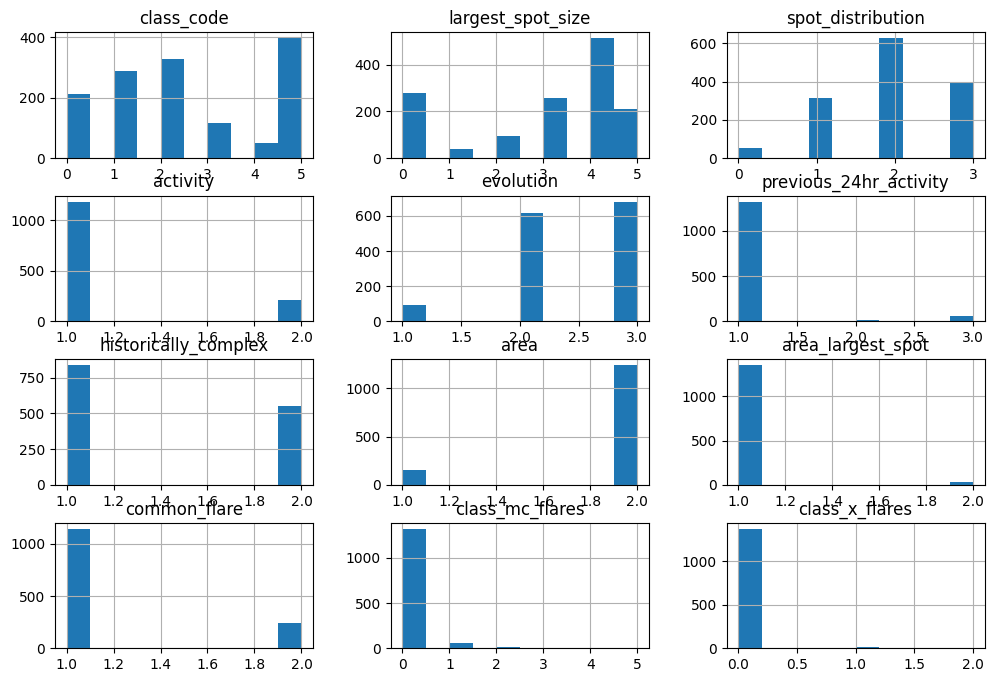

In [37]:
# Feature Distribution

x.hist(figsize=(12, 8))
plt.show()

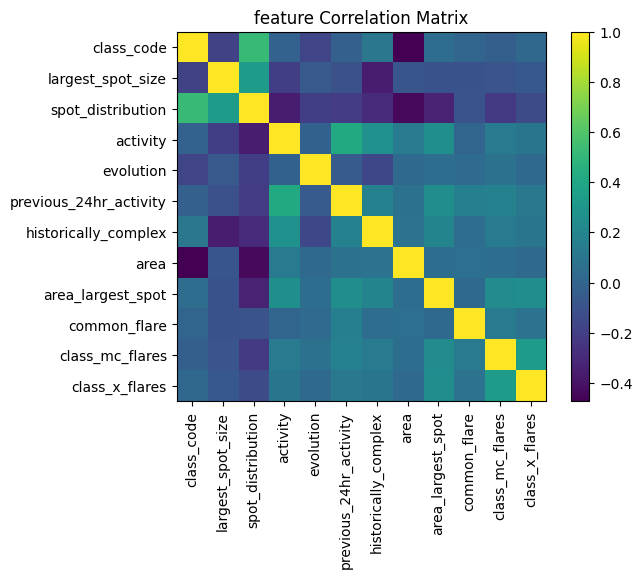

In [39]:
# correlation matrix

import numpy as np

plt.figure()
corr = x.corr()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("feature Correlation Matrix")
plt.show()